# Classification Modeling: Random Forest
### Author: Ehsan Gharib-Nezhad


In [42]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix


import random

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 1: Human dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [43]:
# Load datasets
human = pd.read_csv('../outputs/human_kmer_dataset.csv')

In [44]:
human.head()

,class,2mer,3mer,4mer,5mer,6mer,7mer,8mer,9mer,10mer
0,4,"['at', 'tg', 'gc', 'cc', 'cc', 'cc', 'ca', 'aa...","['atg', 'tgc', 'gcc', 'ccc', 'ccc', 'cca', 'ca...","['atgc', 'tgcc', 'gccc', 'cccc', 'ccca', 'ccaa...","['atgcc', 'tgccc', 'gcccc', 'cccca', 'cccaa', ...","['atgccc', 'tgcccc', 'gcccca', 'ccccaa', 'ccca...","['atgcccc', 'tgcccca', 'gccccaa', 'ccccaac', '...","['atgcccca', 'tgccccaa', 'gccccaac', 'ccccaact...","['atgccccaa', 'tgccccaac', 'gccccaact', 'cccca...","['atgccccaac', 'tgccccaact', 'gccccaacta', 'cc..."
1,4,"['at', 'tg', 'ga', 'aa', 'ac', 'cg', 'ga', 'aa...","['atg', 'tga', 'gaa', 'aac', 'acg', 'cga', 'ga...","['atga', 'tgaa', 'gaac', 'aacg', 'acga', 'cgaa...","['atgaa', 'tgaac', 'gaacg', 'aacga', 'acgaa', ...","['atgaac', 'tgaacg', 'gaacga', 'aacgaa', 'acga...","['atgaacg', 'tgaacga', 'gaacgaa', 'aacgaaa', '...","['atgaacga', 'tgaacgaa', 'gaacgaaa', 'aacgaaaa...","['atgaacgaa', 'tgaacgaaa', 'gaacgaaaa', 'aacga...","['atgaacgaaa', 'tgaacgaaaa', 'gaacgaaaat', 'aa..."
2,3,"['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...","['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...","['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...","['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...","['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...","['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...","['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...","['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...","['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg..."
3,3,"['at', 'tg', 'gt', 'tg', 'gt', 'tg', 'gg', 'gc...","['atg', 'tgt', 'gtg', 'tgt', 'gtg', 'tgg', 'gg...","['atgt', 'tgtg', 'gtgt', 'tgtg', 'gtgg', 'tggc...","['atgtg', 'tgtgt', 'gtgtg', 'tgtgg', 'gtggc', ...","['atgtgt', 'tgtgtg', 'gtgtgg', 'tgtggc', 'gtgg...","['atgtgtg', 'tgtgtgg', 'gtgtggc', 'tgtggca', '...","['atgtgtgg', 'tgtgtggc', 'gtgtggca', 'tgtggcat...","['atgtgtggc', 'tgtgtggca', 'gtgtggcat', 'tgtgg...","['atgtgtggca', 'tgtgtggcat', 'gtgtggcatt', 'tg..."
4,3,"['at', 'tg', 'gc', 'ca', 'aa', 'ac', 'ca', 'ag...","['atg', 'tgc', 'gca', 'caa', 'aac', 'aca', 'ca...","['atgc', 'tgca', 'gcaa', 'caac', 'aaca', 'acag...","['atgca', 'tgcaa', 'gcaac', 'caaca', 'aacag', ...","['atgcaa', 'tgcaac', 'gcaaca', 'caacag', 'aaca...","['atgcaac', 'tgcaaca', 'gcaacag', 'caacagc', '...","['atgcaaca', 'tgcaacag', 'gcaacagc', 'caacagca...","['atgcaacag', 'tgcaacagc', 'gcaacagca', 'caaca...","['atgcaacagc', 'tgcaacagca', 'gcaacagcat', 'ca..."


---

# Split the dataset to train and test set

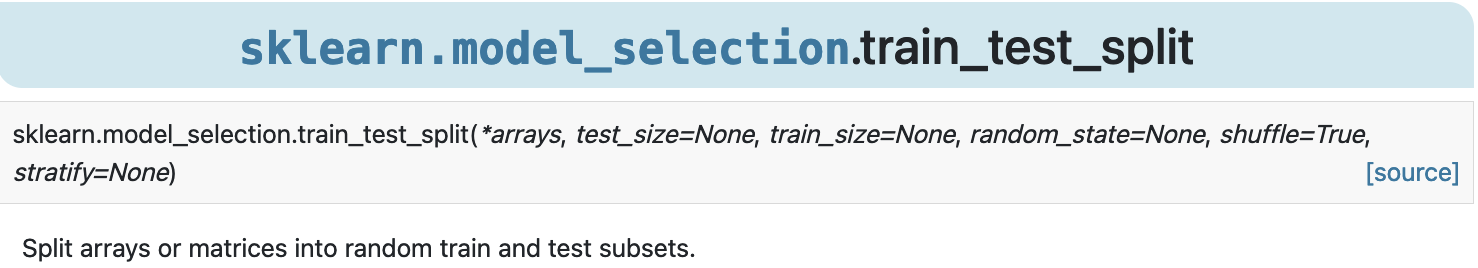
Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [61]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split( [' '.join(x.replace(" ", "")[1:-1].split(',')) 
                                                      for x in human['8mer']] , # for converting the SINGLE string to an array of strings
                                                    human['class'],
                                                    test_size=0.25,
                                                    stratify=human['class'],
                                                    random_state=42)

## Baseline Accuracy
We need to calculate baseline accuracy in order to tell if our model is better than null model.

In [62]:
print ('The train and test dataset has these following fraction of the whole data for their gene family:') 
       
pd.DataFrame(y_train).value_counts(normalize=True),pd.DataFrame(y_test).value_counts(normalize=True)

The train and test dataset has these following fraction of the whole data for their gene family:


(class
 6        0.306545
 4        0.162253
 3        0.153425
 1        0.122070
 0        0.121157
 2        0.079756
 5        0.054795
 dtype: float64,
 class
 6        0.306849
 4        0.162557
 3        0.153425
 0        0.121461
 1        0.121461
 2        0.079452
 5        0.054795
 dtype: float64)

# CountVectorizering the $k$mer dataset for the models

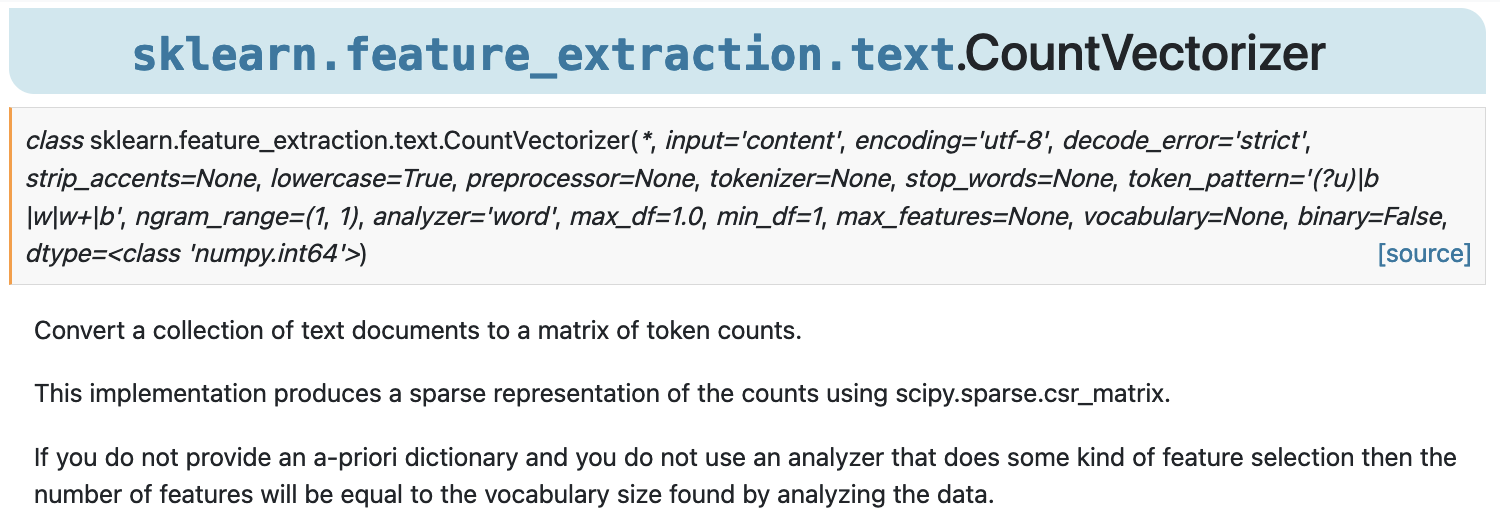
ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [63]:
cvec = CountVectorizer(ngram_range=(4,4))

### Convert train dataset

In [64]:
# Fit & transform the vectorizer on our training corpus.
Xcv_train = cvec.fit_transform(X_train)

In [65]:
# to convert sparse matrix to dense matrix
Xcv_train = pd.DataFrame(Xcv_train.todense(),
                           columns = cvec.get_feature_names() )
Xcv_train.head()

,aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa,aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaac,aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaag,aaaaaaaa aaaaaaaa aaaaaaac aaaaaaca,aaaaaaaa aaaaaaaa aaaaaaac aaaaaacc,aaaaaaaa aaaaaaaa aaaaaaac aaaaaacg,aaaaaaaa aaaaaaaa aaaaaaac aaaaaact,aaaaaaaa aaaaaaaa aaaaaaag aaaaaaga,aaaaaaaa aaaaaaaa aaaaaaag aaaaaagc,aaaaaaaa aaaaaaaa aaaaaaag aaaaaagg,...,tttttttt tttttttc ttttttca tttttcat,tttttttt tttttttc ttttttcc tttttcct,tttttttt tttttttc ttttttct tttttctt,tttttttt tttttttg ttttttgc tttttgct,tttttttt tttttttg ttttttgg tttttggg,tttttttt tttttttg ttttttgt tttttgtt,tttttttt tttttttt tttttttc ttttttca,tttttttt tttttttt tttttttc ttttttcc,tttttttt tttttttt tttttttg ttttttgg,tttttttt tttttttt tttttttg ttttttgt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
Xcv_train.shape

(3285, 971701)

### Convert test dataset

In [67]:
# Transform the test corpus.
Xcv_test = cvec.transform(X_test)

In [68]:
# to convert sparse matrix to dense matrix
Xcv_test = pd.DataFrame(Xcv_test.todense(),
                           columns = cvec.get_feature_names() )
Xcv_test.head()

,aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaaa,aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaac,aaaaaaaa aaaaaaaa aaaaaaaa aaaaaaag,aaaaaaaa aaaaaaaa aaaaaaac aaaaaaca,aaaaaaaa aaaaaaaa aaaaaaac aaaaaacc,aaaaaaaa aaaaaaaa aaaaaaac aaaaaacg,aaaaaaaa aaaaaaaa aaaaaaac aaaaaact,aaaaaaaa aaaaaaaa aaaaaaag aaaaaaga,aaaaaaaa aaaaaaaa aaaaaaag aaaaaagc,aaaaaaaa aaaaaaaa aaaaaaag aaaaaagg,...,tttttttt tttttttc ttttttca tttttcat,tttttttt tttttttc ttttttcc tttttcct,tttttttt tttttttc ttttttct tttttctt,tttttttt tttttttg ttttttgc tttttgct,tttttttt tttttttg ttttttgg tttttggg,tttttttt tttttttg ttttttgt tttttgtt,tttttttt tttttttt tttttttc ttttttca,tttttttt tttttttt tttttttc ttttttcc,tttttttt tttttttt tttttttg ttttttgg,tttttttt tttttttt tttttttg ttttttgt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Xcv_test.shape

(1095, 971701)

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Build Random Forest Model
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

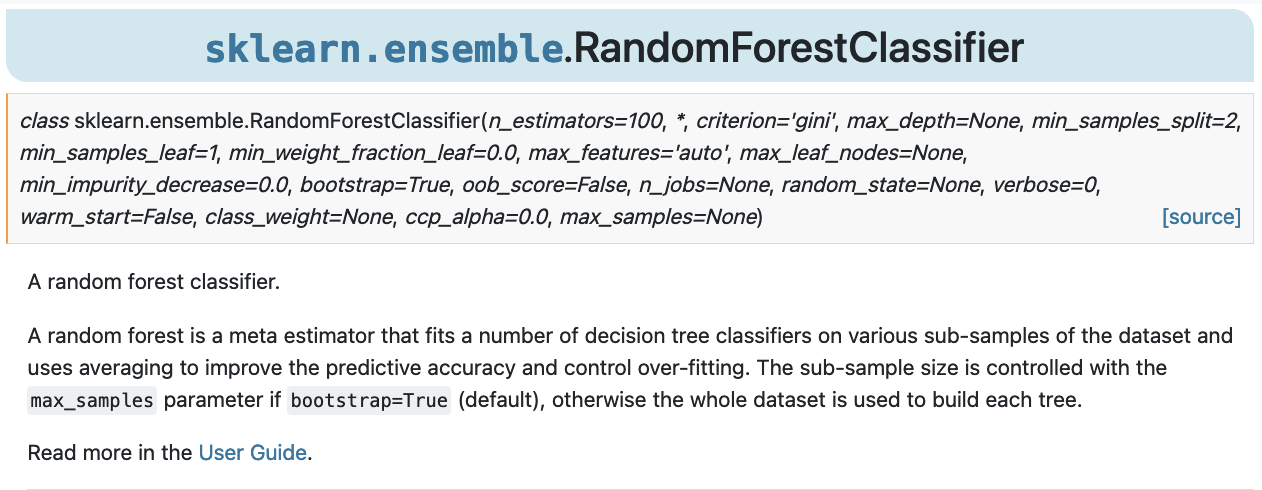


Random Forest Ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### One-vs-one multiclass strategy:

This strategy consists in fitting one classifier per class pair. At prediction time, the class which received the most votes is selected. Since it requires to fit n_classes * (n_classes - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its O(n_classes^2) complexity. However, this method may be advantageous for algorithms such as kernel algorithms which don’t scale well with n_samples. This is because each individual learning problem only involves a small subset of the data whereas, with one-vs-the-rest, the complete dataset is used n_classes times.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

In [70]:
#The fit method of Random Forest class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method

RFc_model = RandomForestClassifier()# OneVsOneClassifier(RandomForestClassifier(),  n_jobs=-1)

RFc_model.fit(Xcv_train, y_train)

RandomForestClassifier()

In [71]:
y_pred = RFc_model.predict(Xcv_test) 

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       133
           1       1.00      0.86      0.93       133
           2       1.00      0.93      0.96        87
           3       0.86      0.95      0.90       168
           4       0.99      0.83      0.90       178
           5       1.00      0.82      0.90        60
           6       0.85      0.99      0.91       336

    accuracy                           0.92      1095
   macro avg       0.96      0.90      0.92      1095
weighted avg       0.93      0.92      0.92      1095



[[121   0   0   3   0   0   9]
 [  0 115   0   6   1   0  11]
 [  0   0  81   2   0   0   4]
 [  0   0   0 160   0   0   8]
 [  1   0   0   9 147   0  21]
 [  0   0   0   4   0  49   7]
 [  0   0   0   3   0   0 333]]
Normalized confusion matrix


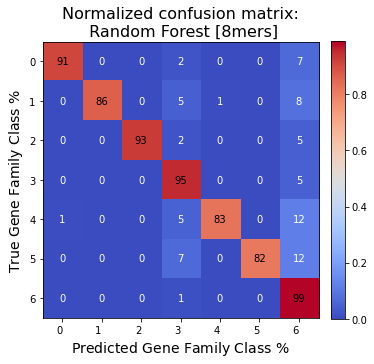

In [73]:
def plot_confusion_matrix(y_true, y_pred, 
                          classes,
                          title = None,
                          normalize = True):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap='coolwarm')
        
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title)
    ax.set_title(title, fontsize=16)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.0f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j]*100, fmt),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "white")
    fig.tight_layout()
#     plt.xlim(-0.5, len(np.unique(y))-0.5)
#     plt.ylim(len(np.unique(y))-0.5, -0.5)
    ax.set_xlabel(r'Predicted Gene Family Class $\%$', fontsize = 14)
    ax.set_ylabel(r'True Gene Family Class $\%$', fontsize = 14)
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plot_confusion_matrix(y_test, y_pred, classes=['0','1','2','3','4','5','6'],
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, 
                      classes = ['0','1','2','3','4','5','6'], 
                      title = 'Normalized confusion matrix:\n Random Forest [8mers]',
                      normalize = True)

plt.show()
